In [1]:
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics.pairwise import cosine_similarity  # Compute cosine similarity between samples in X and Y.
from scipy import sparse  #  sparse matrix package for numeric data.
from scipy.sparse.linalg import svds # svd algorithm

import warnings   
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv(r"C:\Users\Rohit\Desktop\Rohit 2\static\netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
data.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
data.shape

(8807, 12)

In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
data_1=data.copy()
data_1=data.drop(columns=["cast"])

In [8]:
data_1["director"].fillna("Peter Hewitt",inplace=True)

In [9]:
data_1["country"].fillna("india",inplace=True)
data_1["date_added"].fillna("March 2,2019",inplace=True)
data_1["rating"].fillna("PG",inplace=True)
data_1["duration"].fillna("90 min",inplace=True)

In [10]:
data_1.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [12]:
data_1.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


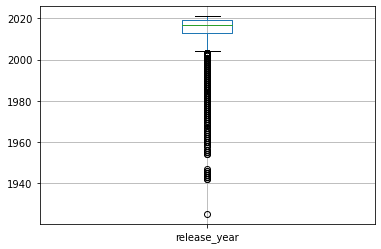

In [13]:
data_1.boxplot("release_year")
plt.show()

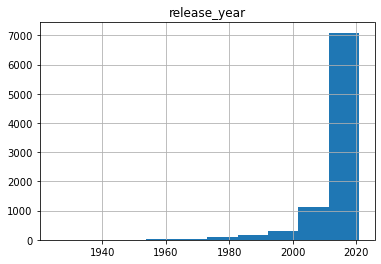

In [14]:
data_1.hist("release_year")
plt.show()

In [15]:
data_1["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

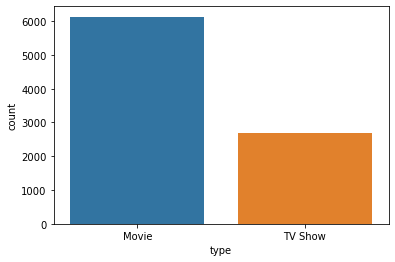

In [16]:
sns.countplot(data_1['type'])
plt.show()


In [17]:
data_1["country"].nunique()

749

In [18]:
data_1["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           291
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
84 min         1
74 min         1
66 min         1
Name: rating, dtype: int64

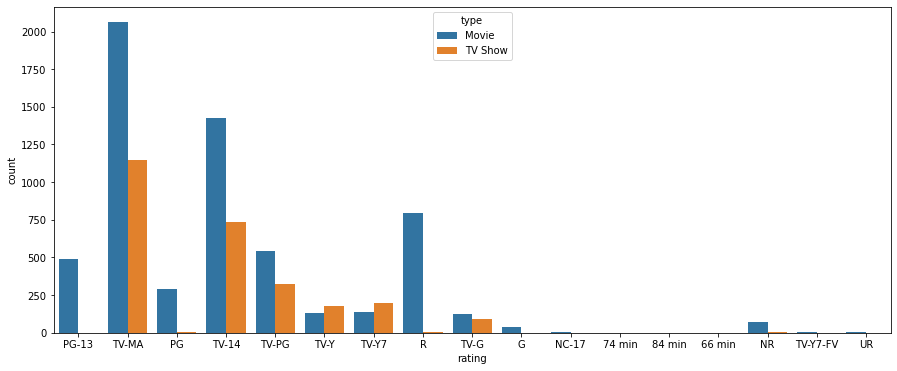

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x="rating",hue="type",data=data_1)
plt.show()

In [20]:
data_1.duration = data_1['duration'].apply(str).str.replace('min','')

In [21]:
data_1.rename(columns={'duration':'seasons'}, inplace=True)

data_1.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)

data_1.seasons = data_1.seasons.str.replace(' Seasons','').astype(int)

In [23]:
data_1["year_added"]=pd.DatetimeIndex(data_1["date_added"]).year
data_1["month_added"]=pd.DatetimeIndex(data_1["date_added"]).month

In [24]:
data_2=data_1.groupby("month_added")["year_added"].value_counts().unstack()
data_2

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_added,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,43.0,72.0,129.0,153.0,205.0,132.0
2,1.0,NaN,NaN,NaN,1.0,NaN,2.0,4.0,15.0,82.0,87.0,148.0,114.0,109.0
3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,17.0,125.0,173.0,182.0,137.0,112.0
4,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,22.0,93.0,115.0,162.0,177.0,188.0
5,NaN,1.0,NaN,1.0,NaN,NaN,NaN,6.0,13.0,86.0,97.0,139.0,157.0,132.0
6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
8,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,34.0,115.0,164.0,131.0,129.0,178.0
9,NaN,NaN,NaN,1.0,NaN,2.0,1.0,7.0,48.0,113.0,124.0,123.0,168.0,183.0


In [25]:
data_1.corr()

,release_year,seasons,year_added,month_added
release_year,1.000000,-0.249173,0.111473,-0.038750
seasons,-0.249173,1.000000,0.028969,-0.015737
year_added,0.111473,0.028969,1.000000,-0.160416
month_added,-0.038750,-0.015737,-0.160416,1.000000


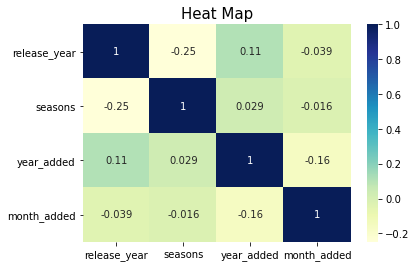

In [26]:
num_corr=data_1.corr()
sns.heatmap(num_corr,annot=True,cmap="YlGnBu")
plt.title("Heat Map",fontsize=15)
plt.show()

In [27]:
International_content = data_1[data_1['listed_in'].str.contains('International')]

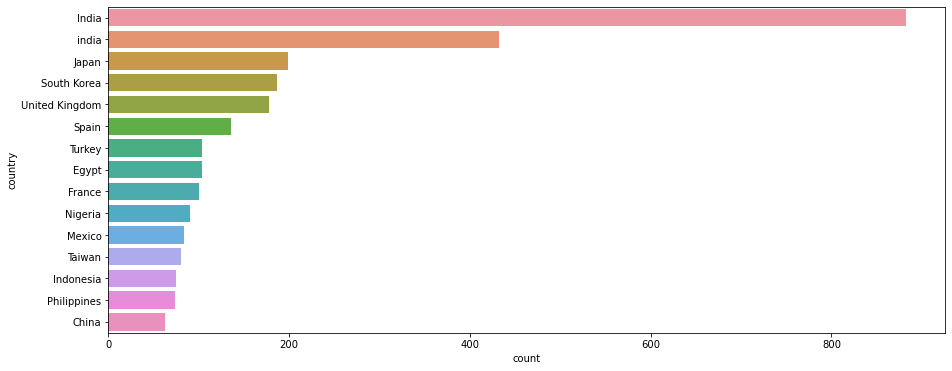

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(y=International_content.country,order=International_content.country.value_counts().index[:15])


In [29]:
movies = data_1[data_1['listed_in'].str.contains('International Movies')]
shows = data_1[data_1['listed_in'].str.contains('International TV Shows')]

Text(0.5, 1.0, 'International TV shows Heatmap')

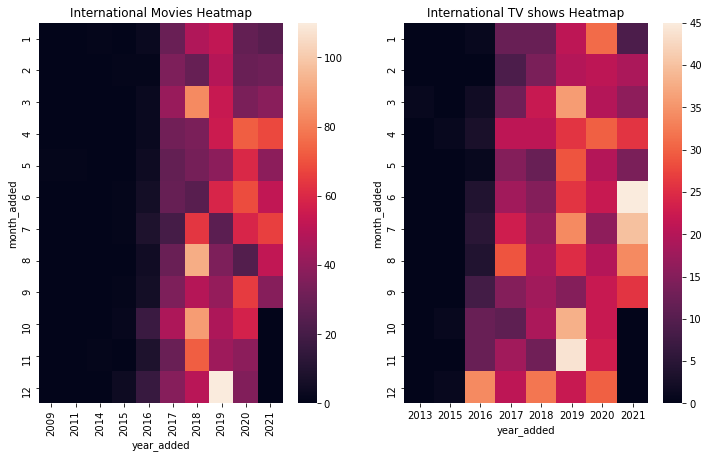

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12,7))

m1=sns.heatmap(movies.groupby('month_added')['year_added'].value_counts().unstack().fillna(0), ax=ax[0])
m1.set_title('International Movies Heatmap')

t1=sns.heatmap(shows.groupby('month_added')['year_added'].value_counts().unstack().fillna(0), ax=ax[1])
t1.set_title('International TV shows Heatmap')

In [44]:
newdf=data_1[['title','director','country','description']]
newdf.head()

,title,director,country,description
0,Dick Johnson Is Dead,Kirsten Johnson,United States,"As her father nears the end of his life, filmm..."
1,Blood & Water,Peter Hewitt,South Africa,"After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,india,To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,Peter Hewitt,india,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,Peter Hewitt,India,In a city of coaching centers known to train I...


In [45]:
features=[]

for i in range(newdf.shape[0]):
    features.append(" ".join(list(newdf.iloc[i].values)))

In [46]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import re
nltk.download("words")

lem=nltk.WordNetLemmatizer()
corpus=[]

for i in range(len(features)):
    review=re.sub('[^a-zA-Z]',' ',features[i])
    review=review.lower()
    review=review.split()
    review=[lem.lemmatize(w) for w in review if w not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [47]:
newdf['features']=corpus

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
cv=CountVectorizer()
cvdf=cv.fit_transform(newdf['features'])

In [50]:
cvdf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
cs=cosine_similarity(cvdf)
cs

array([[1.        , 0.        , 0.        , ..., 0.08377078, 0.11952286,
        0.04428074],
       [0.        , 1.        , 0.        , ..., 0.0489116 , 0.09304842,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.05129892, 0.        ,
        0.10846523],
       ...,
       [0.08377078, 0.0489116 , 0.05129892, ..., 1.        , 0.10012523,
        0.        ],
       [0.11952286, 0.09304842, 0.        , ..., 0.10012523, 1.        ,
        0.        ],
       [0.04428074, 0.        , 0.10846523, ..., 0.        , 0.        ,
        1.        ]])

In [52]:
def movie_rec(title):
    
    #extract movie index of given movie title
    movie_index=newdf[[title in name for name in newdf["title"]]].index[0]
    
    #get similarity score and its index for given movie title
    similarity_score=list(enumerate(cs[movie_index]))
    
    #sorted similarity scores for given movie title (Descending order)
    similarity_score=sorted(similarity_score,key=lambda x:x[1],reverse=True)
    
    #extract top 10 similarity scores for given movie
    similarity_score=similarity_score[1:11]
    
    #extract index values of top 10 movies
    movie_indices=[idx[0] for idx in similarity_score]
    
    #return recommended movies with their index values
    return newdf['title'][movie_indices]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1925       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64


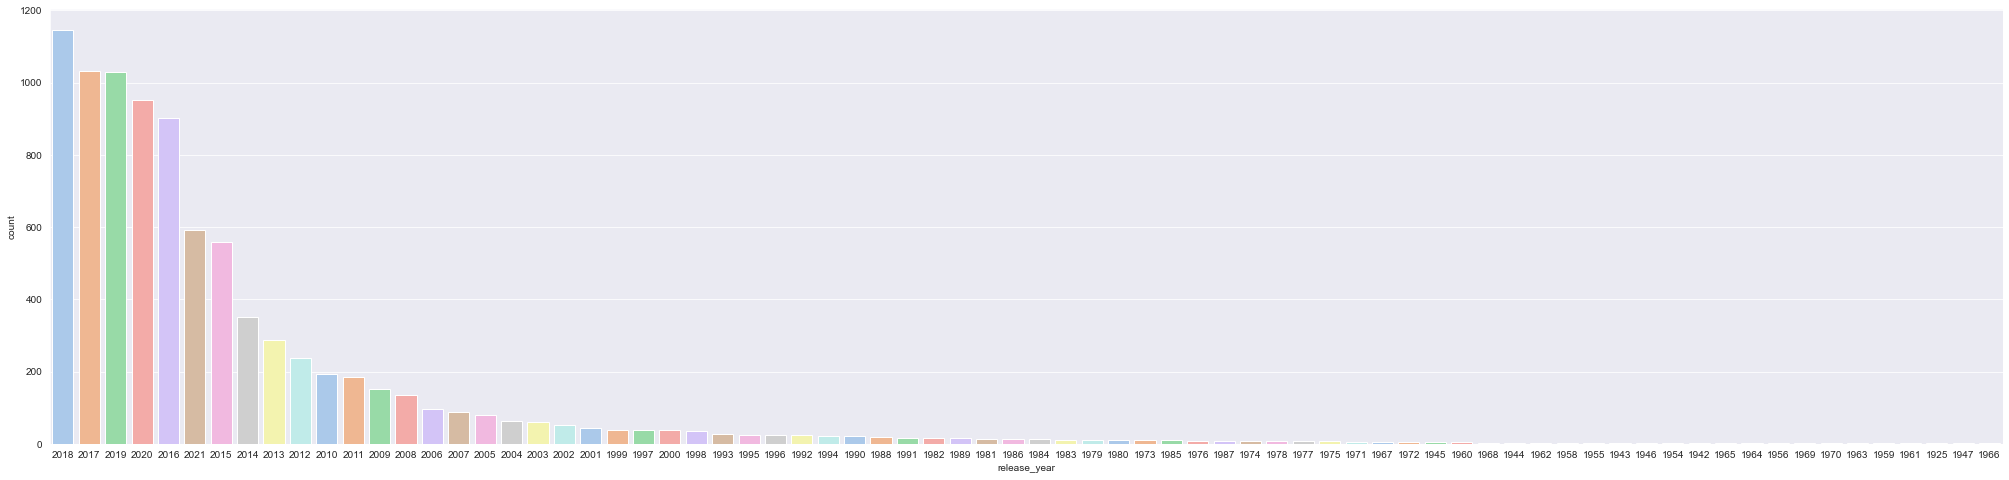

In [53]:
release_year_counts = data_1.release_year.value_counts()
print(release_year_counts)
plt.figure(figsize = (35,8))
sns.countplot(data_1.release_year, order = release_year_counts.index[0:94],palette="pastel")
plt.show()

Text(0, 0.5, 'Total Count')

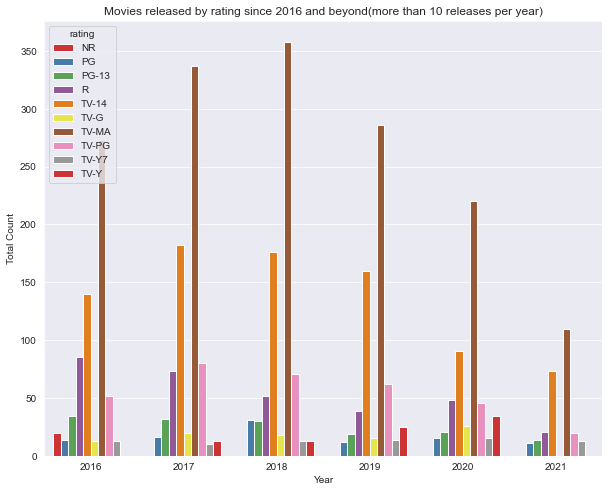

In [54]:
movie = data_1.loc[data_1['type']=='Movie']
movie_trends = movie[movie['release_year']>=2016]
df = movie_trends.groupby(['release_year','rating']).size().reset_index(name = 'Total')
df1 = df[df['Total'] >= 10]

plt.figure(figsize = (10,8))
sns.set_style('darkgrid')
sns.barplot(data = df1,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('Movies released by rating since 2016 and beyond(more than 10 releases per year)')
plt.xlabel('Year')
plt.ylabel('Total Count')

Text(0, 0.5, 'No.of Shows')

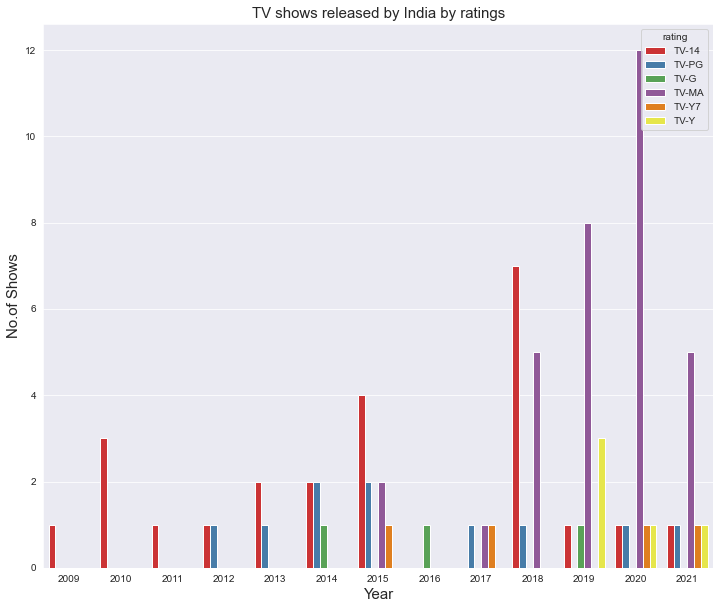

In [55]:
df = data_1[(data_1['type'] == 'TV Show') & (data_1['country'] == 'India') ]
tv_show_India = df.groupby(['release_year','rating']).size().reset_index(name = 'Total')

plt.figure(figsize = (12,10))
sns.set_style('darkgrid')
sns.barplot(data = tv_show_India,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('TV shows released by India by ratings',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No.of Shows',fontsize = 15)